In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
#import goproject.data
warnings.filterwarnings('ignore')

# algunas predefinciones

In [10]:
def plot_barrios(barrios_elegidos):
    bsas_map = gpd.read_file('../gopa_data/barrios-ciudad')
    puntos = gpd.GeoDataFrame(ciudad,
                             geometry = gpd.points_from_xy(ciudad.search_longitude, ciudad.search_latitude))

    fig,ax = plt.subplots(figsize = (10,10))
    bsas_map.plot(ax=ax, color='lightgrey')
    puntos[puntos['BARRIO'].isin(barrios_elegidos)].plot(ax=ax, markersize=5, color='red')
    ax.set_xlim([-58.550, -58.325])
    ax.set_ylim([-34.700, -34.525])
    plt.show()

#  cargamos dataset

In [11]:
ciudad = pd.read_csv('ciudad_barrios.csv')

In [12]:
ciudad['timestamp'] = pd.to_datetime(ciudad['timestamp'])
ciudad['hour'] = ciudad['timestamp'].dt.hour
ciudad['month_number'] = ciudad.timestamp.dt.month
ciudad['month_name'] = ciudad.timestamp.dt.month_name()
ciudad['weekday'] = ciudad.timestamp.dt.weekday
ciudad['weekday_name'] = ciudad.timestamp.dt.day_name()

# elijamos un barrio

In [13]:
barrio_elegido = ['PALERMO']
#barrio_elegido = ['PALERMO','BELGRANO'] #también podemos leegir una lista de barrios!

In [14]:
barrio = ciudad[ciudad['BARRIO'].isin(barrio_elegido)]
#reemplazo los días de la semana en inglés
barrio.weekday_name = barrio.weekday_name.map({'Monday': 'lunes', 'Tuesday': 'martes', 'Wednesday': 'miercoles',
 'Thursday': 'jueves', 'Saturday': 'viernes', 'Friday': 'sabado', 'Sunday': 'domingo'})

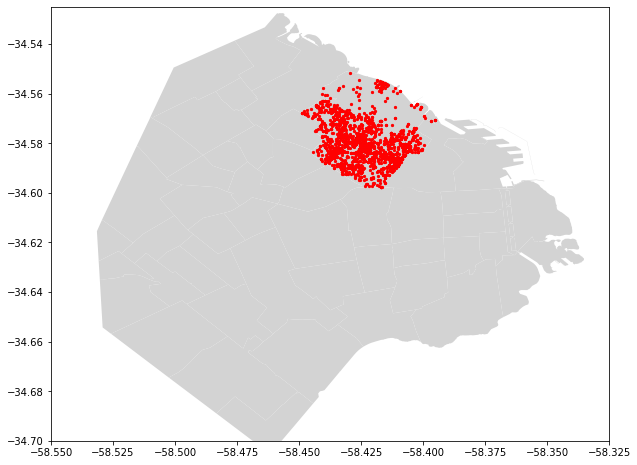

In [15]:
plot_barrios(barrio_elegido)

# Analizamos por día

In [16]:
barrio.head(2)

,Unnamed: 0,arrive,search_method,leave,search_longitude,search_latitude,uid,timestamp,geometry,BARRIO,hour,month_number,month_name,weekday,weekday_name
7911,7911,2021-02-04 16:00:36,startup,2021-02-04 17:00:36,-58.419543,-34.575729,unauthenticated,2021-02-04 15:56:36,POINT (-58.4195432124275 -34.57572915211439),PALERMO,15.0,2.0,February,3.0,jueves
7912,7912,2021-01-12 10:30:04,startup,2021-01-12 11:30:04,-58.414274,-34.581036,unauthenticated,2021-01-12 10:28:04,POINT (-58.41427410222759 -34.5810360932697),PALERMO,10.0,1.0,January,1.0,martes


In [17]:
def distribuicion_por_dia(df, dia= None):    
    if dia == None:
        return df.hour.value_counts(normalize=True).sort_index()
    
    elif dia.lower() in df.weekday_name.unique():
        cond = df['weekday_name'] == dia
        return df[cond].hour.value_counts(normalize=True).sort_index()
    
    else:
        print('error, día no encontrado')

def agregador(columna, n): #columna a dividir, número de partición
    columna = columna.sort_index()
    valores = [ ( f'{i}-{i+n}' , sum(columna[i:i+n-1]) ) for i in range(0,24,n) ]
    return pd.DataFrame(valores,columns=['horario','probabilidad']).set_index('horario')

def plotear_dia(df, dia, n):
    data = distribuicion_por_dia(df, dia)
    agregado = agregador(data,n) 
    x = agregado.index
    y = agregado.probabilidad
    plt.figure(figsize=(15,6))
    plt.bar(x ,y*100, color = 'lightgreen')
    plt.grid(lw=0.4)
    plt.ylabel('probabilidad', fontdict = {'size':20})
    plt.xlabel('Franja Horaria', fontdict = {'size':20})
    
    if n == 1:
        plt.title(f'Distribución de probabilidad cada 1 hora el día {dia}:\n{barrio_elegido[0]}', fontdict = {'size':25})
    else:
        plt.title(f'Distribución de probabilidad cada {n} horas el día {dia}:\n{barrio_elegido[0]}', fontdict = {'size':25})

    
    font = {'family': 'monospace' ,  'color':  'white',
            'size': 10, 'horizontalalignment':'center'}
    for i in range(24//n):
        plt.text(i, #x
                 y[i]*50,
                 f'{round(y[i]*100, 2)}%', 
                 fontdict=font,
                 path_effects=[pe.withStroke(linewidth=2, foreground="black")])

    plt.show()

-----
hora a hora

In [18]:
dias = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']

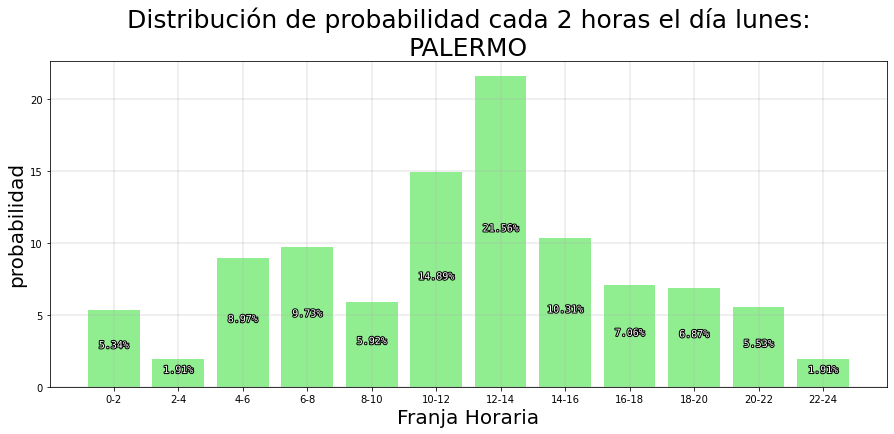

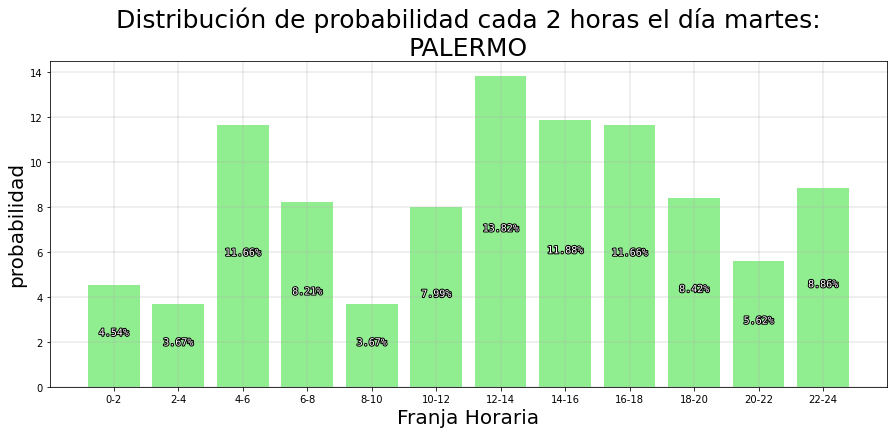

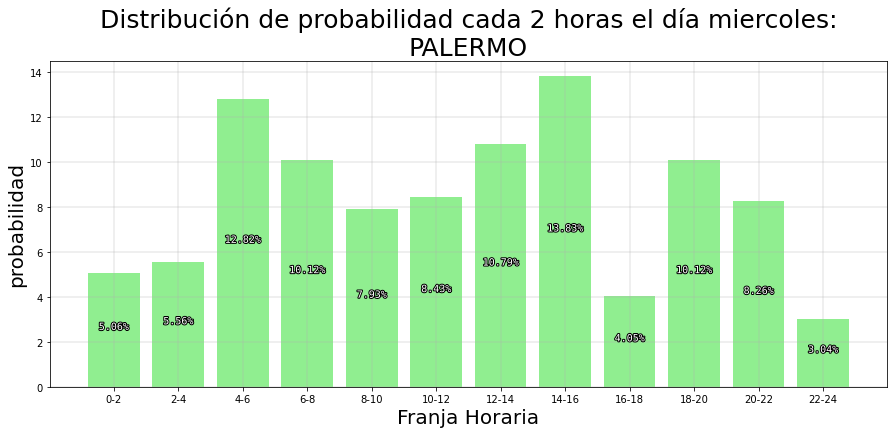

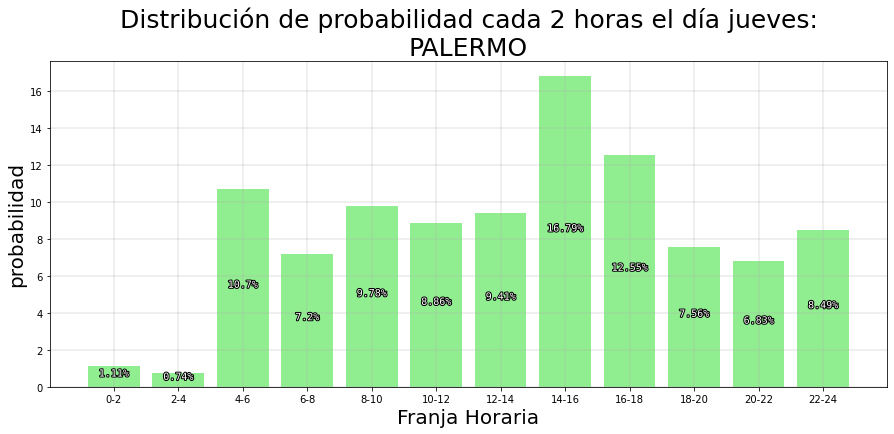

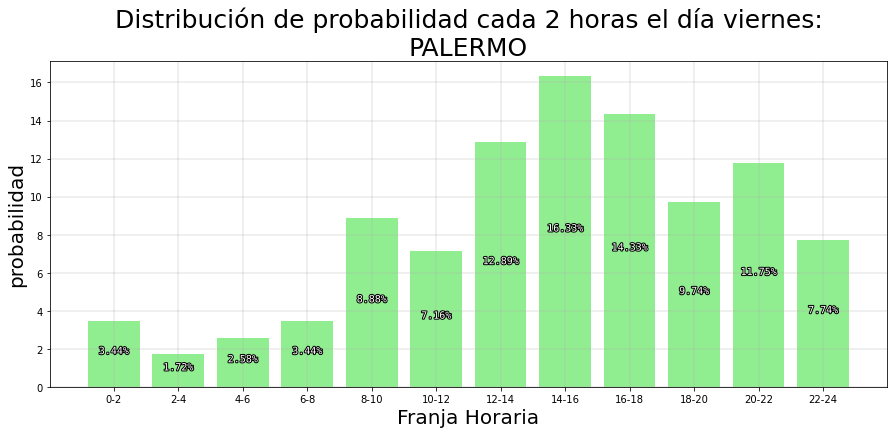

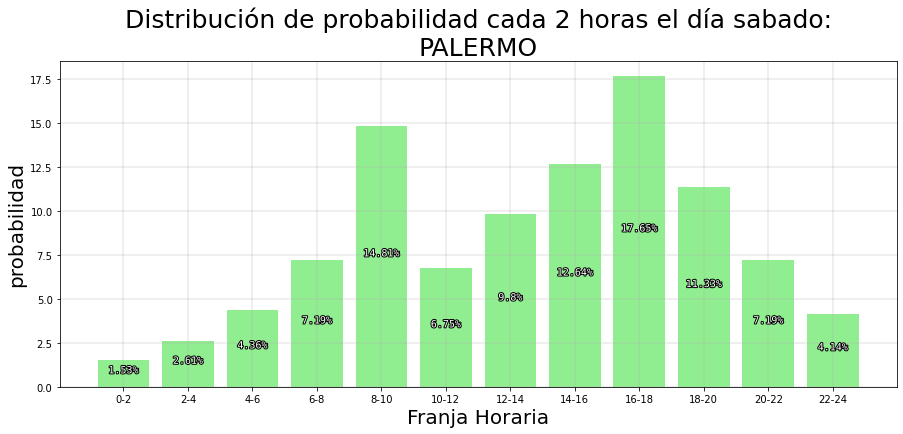

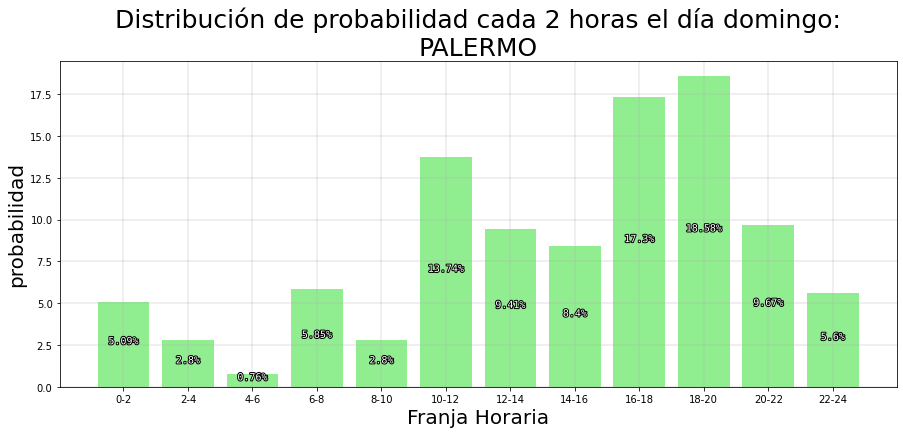

In [19]:
for dia_semana in dias :
    plotear_dia(barrio, dia_semana ,2)    

In [20]:
#devolver distribuciones en un dataframe pro día y hora

In [21]:
#ACORDATE DE ELIMINARR EL STARTUP
#fijate de limianr unos users id de testeo que parece que tienen un montonazo de búsquedas (son 2 o 3)

#cambiame el timestamp por el arrive_hour que implica la hora en la que quieren llegar!

In [22]:
# para hacer despues, que hagamos un histograma de % de ocurrencias por barrio a cada hora y cada día